<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/SC_Euler_Melhorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O método de Euler modificado
*Método Preditor-Corretor*

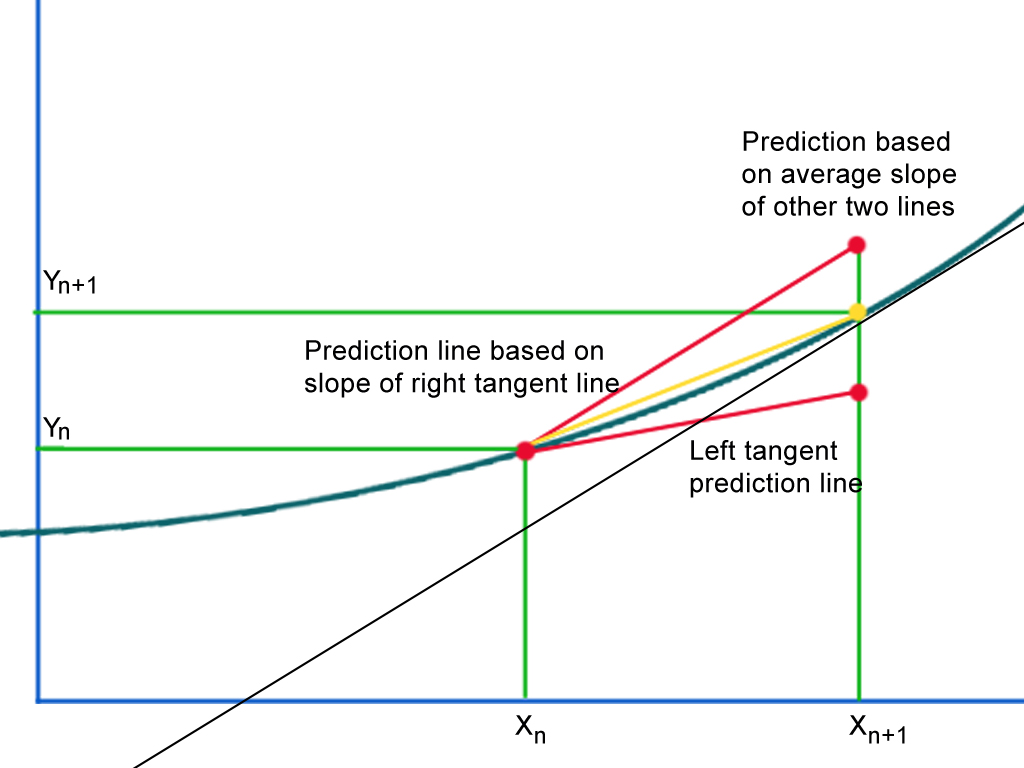

Vamos considerar novamente o problema de valor inicial:

\begin{equation}
\begin{aligned}
\dot{u}(t) &= f(t, u(t)), \quad t>t_{1} \\
u\left(t_{1}\right) &= a
\end{aligned}
\end{equation}

Primeiro, integramos de $t_1$ até $t_2$

\begin{equation}
\begin{aligned}
\int_{t_{1}}^{t_{2}} \dot{u}(t) dt &=\int_{t_{1}}^{t_{2}} f(t, u(t)) dt \\
u\left(t_{2}\right)-u\left(t_{1}\right) &=\int_{t_{1}}^{t_{2}} f(t, u(t)) dt \\
u\left(t_{2}\right) &=u\left(t_{1}\right)+\int_{t_{1}}^{t_{2}} f(t, u(t)) d t
\end{aligned}
\end{equation}


Agora, aplicamos a regra do trapézio na integral do lado direito da expressão:

\begin{equation}
\int_{t_{1}}^{t_{2}} f(t, u(t)) d t=\left[\frac{f\left(t_{1}, u\left(t_{1}\right)\right)+f\left(t_{2}, u\left(t_{2}\right)\right)}{2}\right] h+O\left(h^{3}\right)
\end{equation}

Não conhecemos o valor de $u(t_2)$, vamos aproximá-lo usando o método de Euler:
\begin{equation}
\tilde{u}\left(t_{2}\right)=u\left(t_{1}\right)+h f\left(t_{1}, u\left(t_{1}\right)\right)
\end{equation}


Portanto, temos:

\begin{equation}
\begin{aligned}
u\left(t_2\right) &=u\left(t_1\right)+\int_{t_1}^{t_2} f(t, u(t)) d t \\
& \approx u\left(t_1\right)+\left[\frac{f\left(t_1, u\left(t_1\right)\right)+f\left(t_2, u\left(t_2\right)\right)}{2}\right] h \\
& \approx u\left(t_1\right)+\left[\frac{f\left(t_1, u\left(t_1\right)\right)+f\left(t_2, \tilde{u}\left(t_2\right)\right)}{2}\right] h
\end{aligned}
\end{equation}

Obtemos então a fórmula de recorrência:
\begin{equation}
\begin{aligned}
\tilde{u}_{k+1} &=u_k+h f\left(t_k, u_k\right) \\
u_{k+1} &=u_k+\frac{h}{2}\left(f\left(t_k, u_k\right)+f\left(t_{k+1}, \tilde{u}_{k+1}\right)\right) \\
u_{1} &=a 
\end{aligned}
\end{equation} 

Podemos reescrever e deixar da seguinte forma:

\begin{equation}
\begin{aligned}
k_{1} &=f\left(t_n, u_n\right) \\
k_{2} &=f\left(t_{n+1}, u_{n+1}\right) \\
u_{n+1} &={u}_{n}+h \frac{k_{1}+k_{2}}{2} \\
u_1 &=a 
\end{aligned}
\end{equation}

(aqui, trocamos os índices $k$ por $n$ para evitar a confusão com $k_1$ e $k_2$):

Aqui $k_1$ e $k_2$ são variáveis auxiliares que representam as **inclinações** e devem ser calculadas a cada passo. Esta notação é compatível com a notação usada nos métodos de Runge-Kutta, uma família de esquemas iterativos para aproximar problemas de valor inicial, da qual o método de Euler e o método de Euler melhorado são casos particulares. Veremos os métodos de Runge-Kutta a seguir. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [2]:
def Euler(f,h,s0,tmax=10):
  nt = int(tmax/h)
  u = np.zeros(nt)
  tempo = np.linspace(0,tmax,nt)
  u[0] = s0
    
  for k in np.arange(1,nt):
      u[k] = u[k-1] + h*f(tempo[k-1],u[k-1]) 
      

  return tempo,u

In [3]:
def faz_grafico_euler(tempo,y,f_analitica,h=0.01):
  plt.figure(figsize = (12, 8))
  plt.plot(tempo, y, 'bo--', label='Numérica com h={}'.format(h))
  plt.plot(tempo,f_analitica, 'g', label='Analítica')
  plt.title('Solução Aproximada \
  Solução Analítica')
  plt.xlabel('t')
  plt.ylabel('f(t)')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

# Exemplo 1

Use o método de Euler modificado para resolver o problema de valor inicial:

\begin{equation}
\dot{u} = -0.5 u + 2+ t
\end{equation}

com $u(0)=8$.

In [4]:
def Euler_mod(f,h=0.1,s0=1,tmax=10):
  nt = int(tmax/h)
  u = np.zeros(nt)
  tempo = np.linspace(0,tmax,nt)
  u[0] = s0
  for k in np.arange(1,nt):
      k1 = f(tempo[k-1],u[k-1])
      u_euler = u[k-1] + h*k1 
      k2 = f(tempo[k],u_euler)
      u[k] = u[k-1]+h*(k1+k2)/2
  return tempo,u   


In [5]:
# Resolvendo o exemplo 1 
f = lambda t,s: -0.5*s + 2 + t

In [6]:
tempo, y = Euler_mod(f,0.1,8,10)

In [7]:
f_exata = lambda t: 2*t+8*np.exp(-t/2)

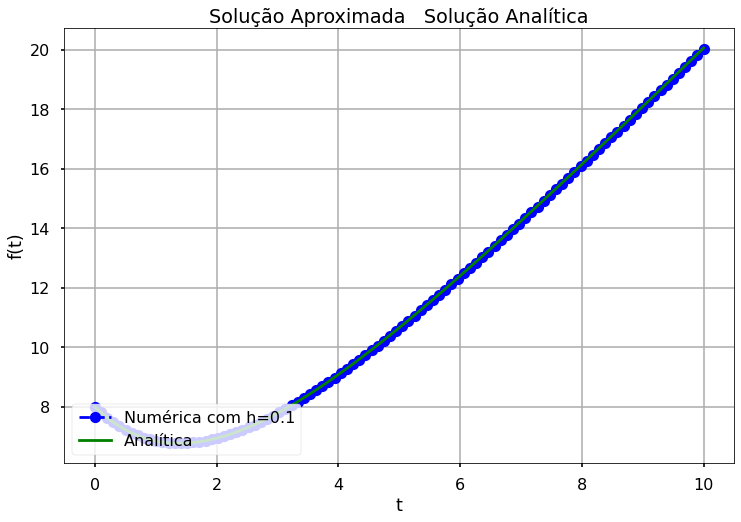

In [8]:
faz_grafico_euler(tempo,y,f_exata(tempo),h=0.1)


In [ ]:
tempo, y_euler = Euler(f,0.1,8,10)



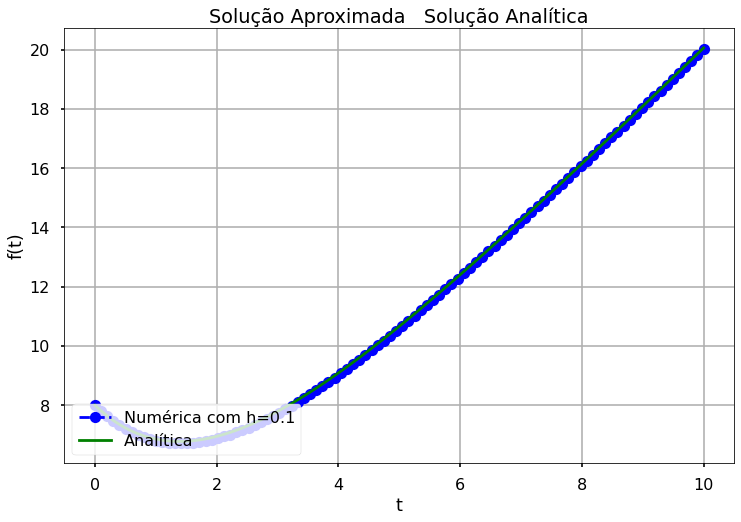

In [ ]:
faz_grafico_euler(tempo,y_euler,f_exata(tempo),h=0.1)
